# Project: Loan Default Prediction 

## Problem Formulation
Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers. The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. 

(Sourse of the data : https://www.kaggle.com/datasets/yasserh/loan-default-dataset)

Number of Instances: 148670

Number of Attributes: 34

# Problem Statement
The goal of this project is to build a machine learning model that can predict whether a customer will default on the loan or not.

## Hypothesis Generation
This is one of the important stages in any Data Science/Machine Learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can highly affect the people who default on the loans :

* Age: Mostly elder people or 20s people might not be able to repay the loans as they dont have much incomes.

* Income: Income of a person plays a major role if a person lost his job or got losses on business  then he might be insolvent and he cant able to repay the loan .

* Purpose of the loan: The purpose of a loan will surely impact the person to repay the loan. If he took the loan for personal expenses with out having much financial discipline. 

* Credit Score: People who are having good credit score having less chances of getting default on loan rather than people who dont have good credit score.

## Steps to follow
It is a Binary Classification Problem

General Overview: Have a General Overview of the data

* ##### EDA: Perform Exploratory Data Analysis(EDA) to gain more clear insights of the data
* ##### Data Preprocessing: With the information gained after performing EDA, Preprocess the Data accordingly
* ##### Model Building: Once the data is properly cleaned and preprocessed, use this data to build a Machine Learning
* ##### Hyperparameter Tuning: Tune the Hyperparameters of the best performing model
* ##### Model Performance: Assess the Performance of the Model on the Testing data set
* ##### Save the model: Save the Best Performing Model
* ##### Predictions: Make Predictions on the Testing data set





In [1]:
# For performing any kind of Mathematical Operations
import numpy as np
# For dealing with DataFrames
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
# For visualizing the plottings better
%matplotlib inline
# For Data Visualization
import seaborn as sns

# Preprocessing modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

# Saving the model
import pickle

## to ignore waarning
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-default-dataset/Loan_Default.csv


In [2]:
data = pd.read_csv('../input/loan-default-dataset/Loan_Default.csv')
data.head()
#Pandas head() method is used to return top n (5 by default) rows of a data frame or series

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df = data.copy()
df.shape

#The shape property returns a tuple representing the dimensionality of the DataFrame. 
#The format of shape is (rows, columns).


(148670, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
# Changing the 'co-applicant_credit_type' column name to  'co_applicant_credit_type'

df.rename(columns={'co-applicant_credit_type': 'co_applicant_credit_type'}, inplace=True)

# Missing Values

In [6]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co_applicant_credit_type         0
age                            200
submission_of_applic

### There are null values present within the dataset for the few columns

#### here we have 2 data types. we need to handle them seperately.

##### 1. Numerical 

##### 2. categorical


### 1. Dealing with the missing values columns of ( datatype = int and float ) by imputing with Mean

In [7]:
df_int = df.select_dtypes(include = ['float64','int64']).fillna((df.select_dtypes(include = ['float64', 'int64']).mean()))

In [8]:
df_int.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,98.728814,1,45.000000
1,24891,2019,206500,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,72.746457,1,37.732932
2,24892,2019,406500,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,80.019685,0,46.000000
3,24893,2019,456500,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587,69.376900,0,42.000000
4,24894,2019,696500,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,91.886544,0,39.000000


In [9]:
#dropping the missing values columns of datatype = int and float 

to_be_dropped=pd.DataFrame(df.select_dtypes(include = ['float64','int64'])).columns

df= df.drop(to_be_dropped,axis=1)

In [10]:
# here we have merged the old df data with new df_int data as we got the without missing values in the df_int 

df = pd.concat([df, df_int], axis=1)

In [11]:
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,98.728814,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,72.746457,1,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,80.019685,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587,69.376900,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,91.886544,0,39.000000


### 2. Dealing with the missing values columns of ( datatype = Object ) by imputing with Mode

In [12]:
df_obj = df.select_dtypes(include = ['object']).fillna((df.select_dtypes(include = ['object']).mode()))

In [13]:
df_obj.isnull().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
credit_type                     0
co_applicant_credit_type        0
age                           200
submission_of_application     200
Region                          0
Security_Type                   0
dtype: int64

In [14]:
df_obj.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co_applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [15]:
#dropping the missing values columns of datatype = object

to_be_dropped=pd.DataFrame(df.select_dtypes(include = ['object'])).columns

df= df.drop(to_be_dropped,axis=1)

In [16]:
# here we have merged the old df data with new df_obj data as we got the without missing values in the df_obj

df = pd.concat([df, df_obj], axis=1)

In [17]:
df.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co_applicant_credit_type,age,submission_of_application,Region,Security_Type
0,24890,2019,116500,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,24891,2019,206500,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,24892,2019,406500,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,24893,2019,456500,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,24894,2019,696500,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


# Checking the dataset is balanced or not. 

In [18]:
df['Security_Type'].value_counts(normalize = True)

direct      0.999778
Indriect    0.000222
Name: Security_Type, dtype: float64

***To handle the imbalanced data i used class_weight="balanced" for the model***

### Dropping the uniquely identifying features : ID, Year

In [19]:
df = df.drop(columns=['ID','year'])

In [20]:
df['open_credit'].value_counts()
# value_counts represents number of records as per each class

nopc    148114
opc        556
Name: open_credit, dtype: int64

In [21]:
df['construction_type'].value_counts()

sb    148637
mh        33
Name: construction_type, dtype: int64

In [22]:
df['Secured_by'].value_counts()

home    148637
land        33
Name: Secured_by, dtype: int64

In [23]:
df['Security_Type'].value_counts()

direct      148637
Indriect        33
Name: Security_Type, dtype: int64

After checking every features value counts we get to know that 'open_credit','construction_type','Secured_by','Security_Type' are having only single major category so we have to drop all the records beloning to the minority class.

1. Delete or drop all the records belonging to the minority class  
2. Drop the column

In [24]:
df.drop(df[df['Security_Type'] == "Indriect"].index, inplace = True,axis =0)

In [25]:
df.drop(df[df['open_credit'] == "opc"].index, inplace = True,axis =0)

In [26]:
df.drop(df[df['construction_type'] == "mh"].index, inplace = True,axis =0)

In [27]:
df.drop(df[df['Secured_by'] == "opc"].index, inplace = True,axis =0)

In [28]:
#  and also these coloumns have only single category it doent contribute any pattern to the target variable so im dropping them

df = df.drop(columns=['open_credit','construction_type','Secured_by','Security_Type'])

In [29]:
df.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,Neg_ammortization,interest_only,lump_sum_payment,occupancy_type,total_units,credit_type,co_applicant_credit_type,age,submission_of_application,Region
0,116500,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,98.728814,1,...,not_neg,not_int,not_lpsm,pr,1U,EXP,CIB,25-34,to_inst,south
1,206500,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,72.746457,1,...,not_neg,not_int,lpsm,pr,1U,EQUI,EXP,55-64,to_inst,North
2,406500,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,80.019685,0,...,neg_amm,not_int,not_lpsm,pr,1U,EXP,CIB,35-44,to_inst,south
3,456500,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587,69.376900,0,...,not_neg,not_int,not_lpsm,pr,1U,EXP,CIB,45-54,not_inst,North
4,696500,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,91.886544,0,...,not_neg,not_int,not_lpsm,pr,1U,CRIF,EXP,25-34,not_inst,North


# correlation 

### Checking whether any correlation existed among the features

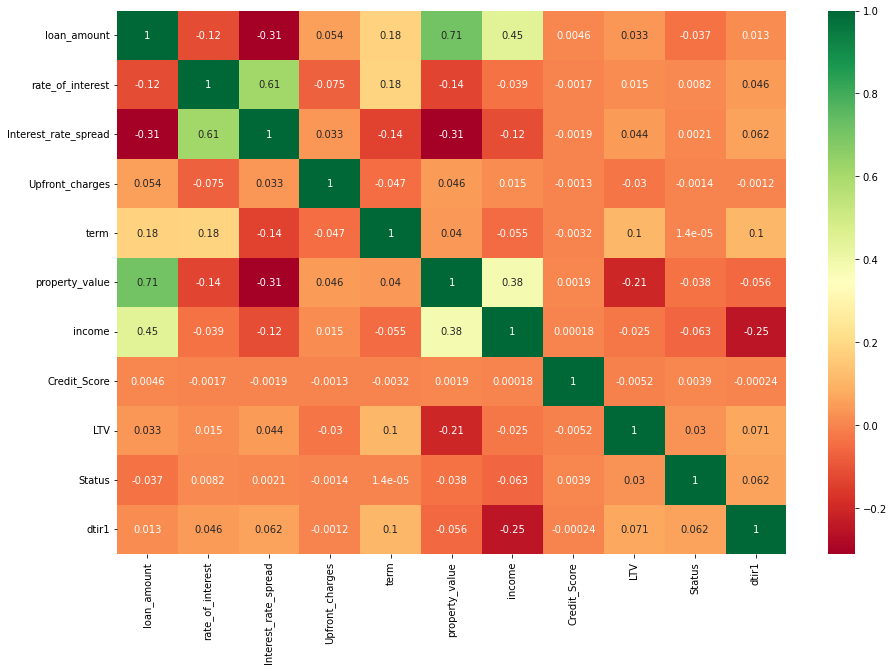

In [30]:
corr = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### There isn't enough correlation among the input features in order to drop any

# Train-Test Split

In [31]:
X = df.drop(columns=['Status'])
#The drop() method removes the specified row or column.

In [32]:
X.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,...,Neg_ammortization,interest_only,lump_sum_payment,occupancy_type,total_units,credit_type,co_applicant_credit_type,age,submission_of_application,Region
0,116500,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,98.728814,45.000000,...,not_neg,not_int,not_lpsm,pr,1U,EXP,CIB,25-34,to_inst,south
1,206500,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,72.746457,37.732932,...,not_neg,not_int,lpsm,pr,1U,EQUI,EXP,55-64,to_inst,North
2,406500,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,80.019685,46.000000,...,neg_amm,not_int,not_lpsm,pr,1U,EXP,CIB,35-44,to_inst,south
3,456500,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587,69.376900,42.000000,...,not_neg,not_int,not_lpsm,pr,1U,EXP,CIB,45-54,not_inst,North
4,696500,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,91.886544,39.000000,...,not_neg,not_int,not_lpsm,pr,1U,CRIF,EXP,25-34,not_inst,North


In [33]:
y = df['Status']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Status, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Preprocessing

### Preprocessing the Train & Test Data separately to avoid Data Leakage

# Outliers 

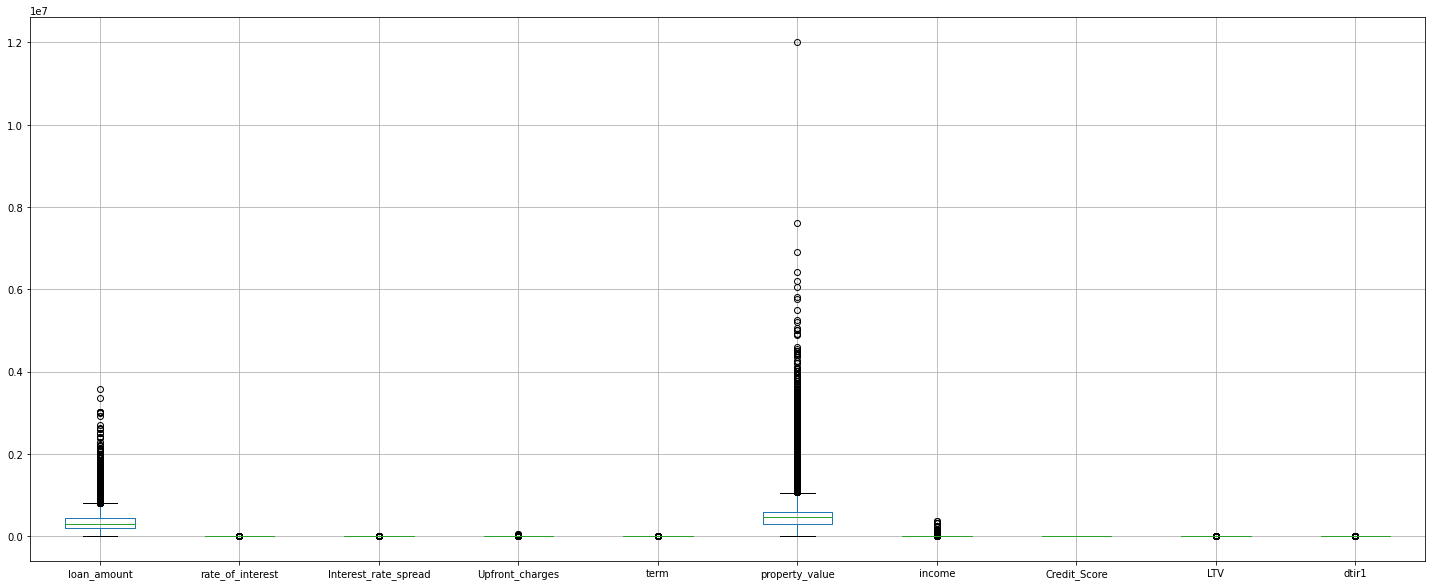

In [35]:
plt.figure(figsize=(25, 10))

X_train.boxplot()
plt.show()

### Features with outliers

1. loan_amount

2. rate_of_interest

3. Interest_rate_spread

4. Upfront_charges

5. term

6. property_value

7. income

8. LTV

In [36]:
outliers_features = ['loan_amount','rate_of_interest','Interest_rate_spread',
                     'Upfront_charges','term','property_value','income','LTV']

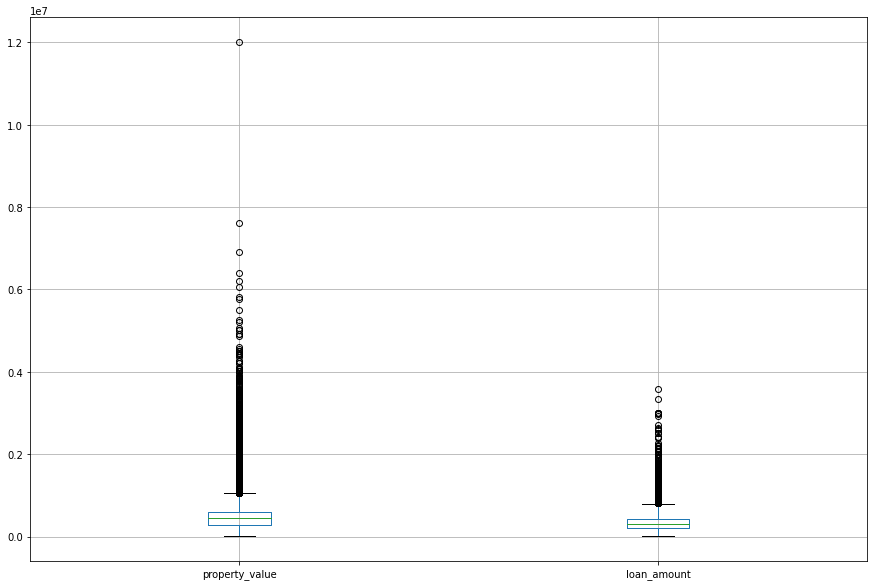

In [37]:
plt.figure(figsize=(15,10))

X_train[[ 'property_value','loan_amount']].boxplot()
plt.show()

## Creating a custom Transformer to handle the Outliers

In [38]:
# My custom Transformer to handle the Outliers

from sklearn.base import TransformerMixin
import pandas as pd
pd.options.mode.chained_assignment = None  # To ignore the warning for not returning a copied DataFrame

class HandleOutliers(TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

        from scipy.stats import shapiro # shapiro test will output the value of p 

        for col in X.columns : # Looping through all columns within the given DataFrame
            
            # If p-value < 0.05 == Skewed Distribution, else Normal Distribution
            
            if shapiro(X[col]).pvalue < 0.05 :

                # IQR method to handle outliers with Skewed Distribution
                q1 = X[col].quantile(0.25)
                q3 = X[col].quantile(0.75)

                # iqr = q3 - q1

                lower_boundary = q1 - 1.5 * q1
                upper_boundary = q3 + 1.5 * q3

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary

                
            else :

                # 3-Sigma method to handle outliers with Normal Distribution
                lower_boundary = X[col].mean() - 3 * X[col].std()
                upper_boundary = X[col].mean() + 3 * X[col].std()

                X.loc[X[col] <= lower_boundary, col] = lower_boundary
                X.loc[X[col] >= upper_boundary, col] = upper_boundary
                
        return X

In [39]:
# here we have instantiated handleoutliers(classs) to object outliers 
outliers = HandleOutliers()

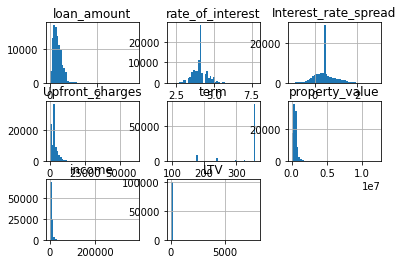

In [40]:
# X_train before handling the outliers
X_train[outliers_features].hist(bins=50)
plt.show()

In [41]:
# using a method of handleoutliers class with fit_transform
outliers_df = outliers.fit_transform(X_train[outliers_features])

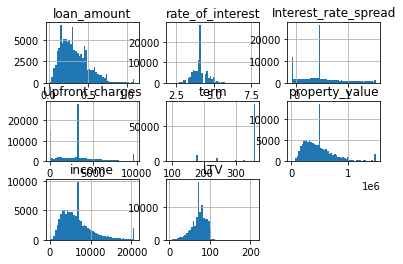

In [42]:
outliers_df.hist(bins=50)
plt.show()

In [43]:
X_train.drop(outliers_features, axis=1, inplace=True)

In [44]:
X_train = pd.concat([X_train, outliers_df], axis=1)

# Handling Categorical Features (Encoding)

In [45]:
# Appending all the features with dtype == 'object' (Categorical Features) in a list
cat_features = []

for col in X_train.columns :
    if X_train[col].dtype == 'object' :
        cat_features.append(col)
        
cat_features

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'occupancy_type',
 'total_units',
 'credit_type',
 'co_applicant_credit_type',
 'age',
 'submission_of_application',
 'Region']

### Nominal Features (To OneHot Encode)

#### Write a note: Assuming this Feature as Categorical in nature, coz we haven't provided the entire information

1. loan_limit

2. Gender

3. approv_in_adv

4. loan_type

5. loan_purpose

6. Credit_Worthiness

7. open_credit

8. business_or_commercial

9. Neg_ammortization

10. interest_only

11. lump_sum_payment

12. construction_type

13. occupancy_type

14. Secured_by

15. total_units

16. credit_type

17. co_applicant_credit_type

18. age

19. submission_of_application

20. Region

21. Security_Type

### a) OneHotEncoding


In [46]:
X_train_obj = X_train.select_dtypes(include = ['object'])


for col in X_train_obj :
        dummies_col = pd.get_dummies(X_train[col], prefix = col, drop_first=True)
        X_train_obj = pd.concat([X_train_obj, dummies_col], axis=1)


X_train_obj.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south
109421,cf,Female,pre,type2,p1,l1,b/c,not_neg,not_int,not_lpsm,...,0,1,0,0,0,0,1,0,0,0
47176,cf,Sex Not Available,nopre,type1,p1,l1,nob/c,neg_amm,not_int,not_lpsm,...,0,0,0,0,0,0,1,0,0,1
102322,cf,Joint,nopre,type2,p4,l1,b/c,not_neg,not_int,not_lpsm,...,1,0,0,0,0,0,0,0,0,0
115375,cf,Male,nopre,type1,p4,l1,nob/c,neg_amm,not_int,not_lpsm,...,0,0,0,0,0,0,1,0,0,0
85148,cf,Male,nopre,type1,p4,l1,nob/c,not_neg,not_int,not_lpsm,...,0,0,0,0,0,0,0,0,0,1


In [47]:
X_train = pd.concat([X_train, X_train_obj], axis=1)

In [48]:
to_be_dropped=pd.DataFrame(X_train.select_dtypes(include = ['object'])).columns

X_train = X_train.drop(to_be_dropped,axis=1)

In [49]:
 X_train.head()

,Credit_Score,dtir1,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south
109421,651,32.000000,76500,4.375,1.544687,1736.31,360.0,78000.0,2760.000000,98.076923,...,0,1,0,0,0,0,1,0,0,0
47176,769,32.000000,306500,4.375,0.033000,3865.00,324.0,388000.0,4680.000000,78.994845,...,0,0,0,0,0,0,1,0,0,1
102322,558,37.732932,456500,3.125,0.530400,0.00,360.0,528000.0,6957.338876,86.458333,...,1,0,0,0,0,0,0,0,0,0
115375,724,36.000000,236500,4.375,0.547600,3800.09,240.0,298000.0,4020.000000,79.362416,...,0,0,0,0,0,0,1,0,0,0
85148,550,38.000000,636500,3.375,0.122400,0.00,240.0,998000.0,8760.000000,63.777555,...,0,0,0,0,0,0,0,0,0,1


### Preprocessing the Test Data separately

In [50]:
# 1. Handling the outliers (Using transform method for Test data)
outliers_df = outliers.transform(X_test[outliers_features])

X_test.drop(outliers_features, axis=1, inplace=True)

X_test = pd.concat([X_test, outliers_df], axis=1)

# 2. OneHotEncoding

X_test_obj = X_test.select_dtypes(include = ['object'])


for col in X_test_obj :
        dummies_col = pd.get_dummies(X_test[col], prefix = col, drop_first=True)
        X_test_obj = pd.concat([X_test_obj, dummies_col], axis=1)


X_test_obj.head()

X_test = pd.concat([X_test, X_test_obj], axis=1)

to_be_dropped=pd.DataFrame(X_test.select_dtypes(include = ['object'])).columns

X_test = X_test.drop(to_be_dropped,axis=1)

In [51]:
X_test.head()

,Credit_Score,dtir1,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south
22328,881,24.0,136500,4.125000,0.793300,3633.500000,324.0,168000.0,3480.0,81.250000,...,0,0,0,0,0,0,1,0,0,1
35757,767,44.0,396500,4.000000,0.188800,0.000000,240.0,548000.0,8160.0,72.354015,...,0,0,0,0,0,0,0,0,0,1
97235,769,48.0,386500,3.750000,0.587000,1690.000000,240.0,528000.0,5760.0,73.200758,...,0,0,0,0,0,0,0,0,0,1
110623,516,42.0,176500,4.500000,0.972000,3953.130000,180.0,208000.0,5040.0,84.855769,...,0,0,1,0,0,0,1,0,0,0
89260,648,52.0,106500,4.045476,0.441656,3224.996127,360.0,118000.0,2220.0,90.254237,...,0,1,0,0,0,0,1,0,0,1


In [52]:
(X_train.columns == X_test.columns).all()

True

# Model Building


### Logistic Regression

In [53]:
log = LogisticRegression(class_weight="balanced")
log_model = log.fit(X_train, y_train)
log_model.score(X_test, y_test)

0.5285366402684838

### Decision Tree Algorithm

In [54]:
dt_model=DecisionTreeClassifier(class_weight="balanced")
dt_model.fit(X_train,y_train)
dt_model.score(X_test, y_test)

0.9999795362923855

### Random Forest Algorithm


In [55]:
rf = RandomForestClassifier(class_weight="balanced")
rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)


1.0

### Tuning the Hyperparameters of RandomForest Model

In [56]:
rf_params = {
    'n_estimators' : [100,150,140,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]
}

In [57]:
rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10)

In [58]:
rf_best_model = rf_rs.fit(X_train, y_train)

In [59]:
rf_best_model.score(X_test, y_test)

1.0

In [60]:
rf_best_model.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_leaf_nodes': None,
 'max_depth': 4}

In [61]:
rf_best_model.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=10, n_estimators=150)

# Model Performance

In [62]:
y_pred = rf_best_model.predict(X_test)


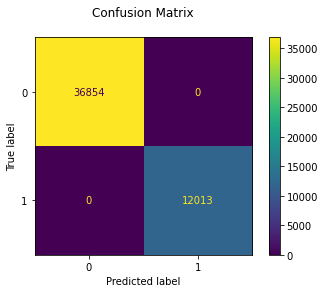

In [63]:
plot_confusion_matrix(rf_best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [64]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36854
           1       1.00      1.00      1.00     12013

    accuracy                           1.00     48867
   macro avg       1.00      1.00      1.00     48867
weighted avg       1.00      1.00      1.00     48867



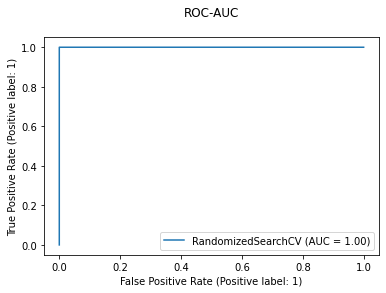

In [65]:
plot_roc_curve(rf_best_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()